# Sales Insights EDA

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Acquisition & Cleaning

#### Importing dataset

In [3]:
df = pd.read_csv("../data/Sample - Superstore.csv", encoding='unicode_escape')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Inspect the dataset

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [17]:
df.drop_duplicates(inplace=True)

#### Converting 'Date' data types

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### Feature Engineering columns

In [21]:
df['Profit Margin'] = df['Profit']/df['Sales']

In [22]:
df['Delivery Days'] = df['Ship Date'] - df['Order Date']

In [27]:
df['Month'] = df['Order Date'].dt.month_name()

In [28]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Delivery Days,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,3 days,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,3 days,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,4 days,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,7 days,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,7 days,October


#### Export the cleaned dataset

In [29]:
df.to_csv('../data/cleaned_superstore.csv', index=False)

Quick Summary of the cleaned dataset

### Exploratory Data Analysis (EDA)

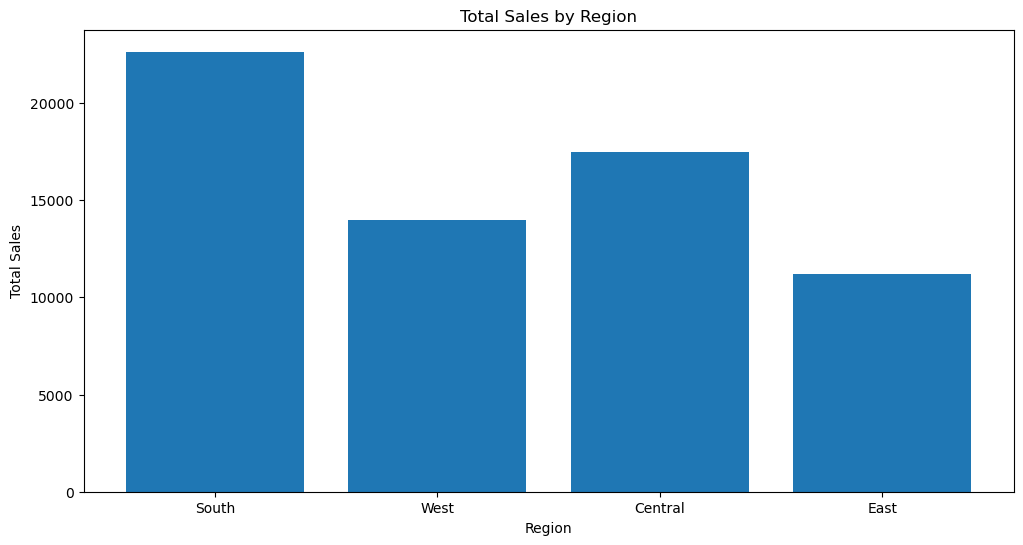

In [53]:
plt.figure(figsize=(12, 6))

plt.bar(df['Region'], df['Sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

In [93]:
total_profit = df.groupby('Category')['Profit'].sum().round(2)
total_profit

Category
Furniture           18451.27
Office Supplies    122490.80
Technology         145454.95
Name: Profit, dtype: float64

In [94]:
total_sale = df.groupby('Category')['Sales'].sum().round(2)
total_sale

Category
Furniture          741999.80
Office Supplies    719047.03
Technology         836154.03
Name: Sales, dtype: float64

<Axes: title={'center': 'Profit by Category'}, xlabel='Category', ylabel='Total Profit'>

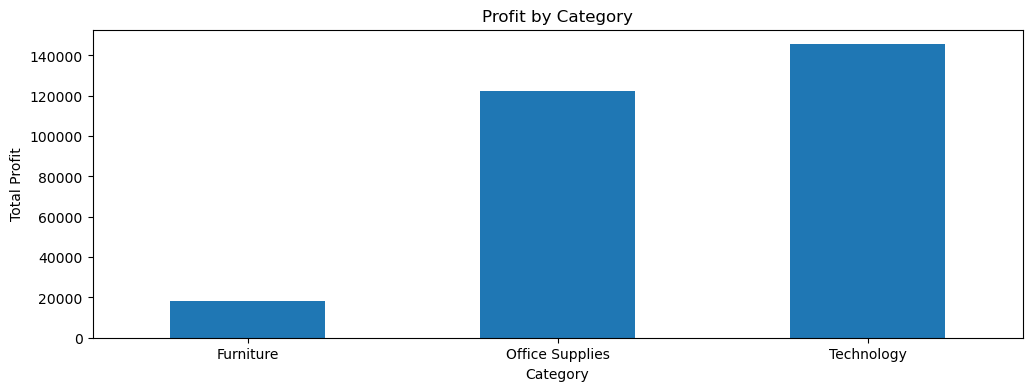

In [112]:
plt.figure(figsize=(12,4))

total_profit.plot(xlabel='Category', ylabel='Total Profit', kind='bar', title='Profit by Category', rot=0)

<Axes: title={'center': 'Sale by Category'}, xlabel='Category', ylabel='Total Sale'>

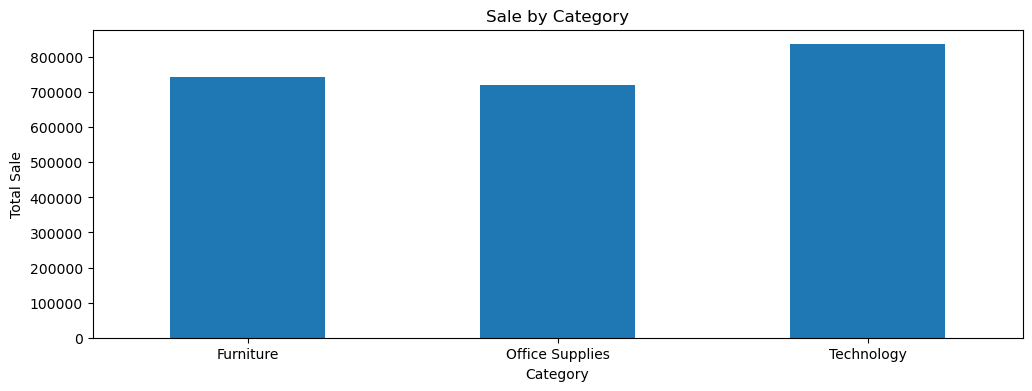

In [113]:
plt.figure(figsize=(12,4))

total_sale.plot(xlabel='Category', ylabel='Total Sale', kind='bar', title='Sale by Category', rot=0)

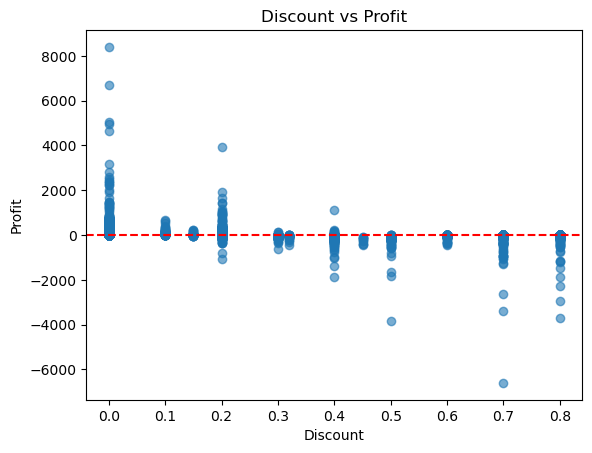

In [118]:
plt.scatter(df['Discount'], df['Profit'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()

In [127]:
total_overtime = df.groupby('Order Date').agg(total_sales=('Sales', 'sum'), total_profit=('Profit', 'sum'))

Text(0.5, 1.0, 'Monthly Sales Trend')

<Figure size 1200x600 with 0 Axes>

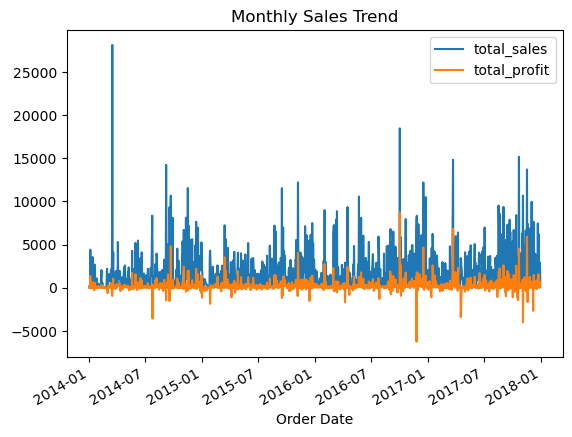

In [132]:
plt.figure(figsize=(12,6))

total_overtime.plot(kind='line')
plt.title('Monthly Sales Trend')

In [151]:
segment_perf = df.groupby('Segment')[['Sales', 'Profit']].sum().round(2)
segment_perf

,Sales,Profit
Segment,,
Consumer,1161401.34,134119.21
Corporate,706146.37,91979.13
Home Office,429653.15,60298.68


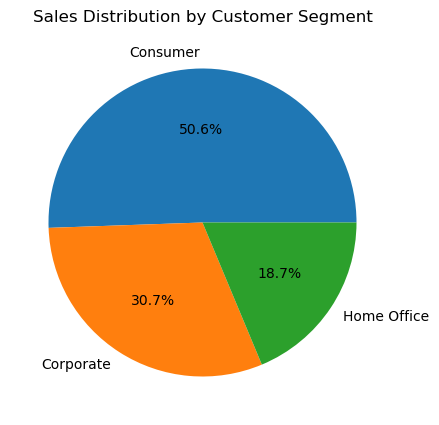

In [158]:
segment_perf['Sales'].plot(kind='pie', autopct='%1.1f%%',title='Sales Distribution by Customer Segment')
plt.ylabel('')
plt.show()

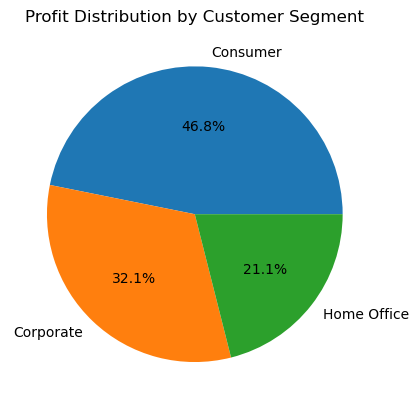

In [159]:
segment_perf['Profit'].plot(kind='pie', autopct='%1.1f%%',title='Profit Distribution by Customer Segment')
plt.ylabel('')
plt.show()